
# Machine learning based model to predict disease severity in Covid-19 patients
# Import all important libraries


In [133]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gdcm
import pydicom as dicom
from PIL import Image
import matplotlib.pyplot as plt

# Read Image Paths from Directory

In [134]:
imagePaths=[]
labels = []
for root, dirnames, filenames in os.walk(r'C:\Users\hp\Covidproject\Data'):
    for filename in filenames:
        if (filename[-3:] == 'dcm'):
            imagePaths.append(os.path.join(root, filename))
            labels.append(root[30:31])            
print(len(labels))
print(len(imagePaths))

404
404


In [132]:
labels[1]

'0'

# Make Folder number as label for each image

In [136]:
label=[]
for i in labels:
    label.append(int(i))  

In [126]:
len(label)

404

# VGG

# resizing images

In [138]:
resized_image_VGG=[]
for i in imagePaths:
    image1_VGG=dicom.read_file(i)
    im_VGG=image1_VGG.pixel_array
    im2_VGG=cv2.resize(im_VGG,(224,224))
    resized_image_VGG.append(im2_VGG)

In [139]:
len(resized_image_VGG)

404

In [140]:
lst1_VGG=[]
for i in resized_image_VGG[0:]:
    resized_images_VGG=np.array([i,i,i])
    resized_images_VGG=np.moveaxis(resized_images_VGG,0,-1)
    lst1_VGG.append(resized_images_VGG)

In [142]:
images_VGG=np.array(lst1_VGG)
images_VGG=np.array(lst1_VGG)
images_VGG.shape

(404, 224, 224, 3)

# Updating the previous label with its orignal class 

In [10]:
Mild=[0]
Server=[1]

updated_label=[]

for i in label:
    if i in Mild:
        updated_label.append(0)
    elif i in Server:
        updated_label.append(1)     

# Convert the updated labels into array

In [11]:
updated_label=np.array(updated_label)
updated_label=updated_label.reshape(len(updated_label),1)

In [12]:
images_VGG.shape

(404, 224, 224, 3)

In [13]:
len(updated_label)
updated_label.shape

(404, 1)

# Splitting the dataset into training and testing

In [23]:
from sklearn.model_selection import train_test_split
x_train_VGG, x_test_VGG, y_train_VGG, y_test_VGG = train_test_split(images_VGG, updated_label,test_size=0.15,shuffle=True,stratify=updated_label)

(array([171.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 172.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

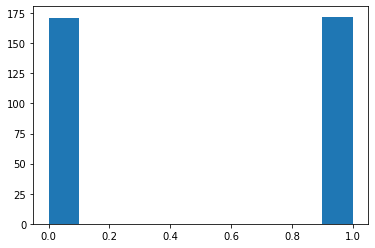

In [24]:
plt.hist(y_train_VGG)

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

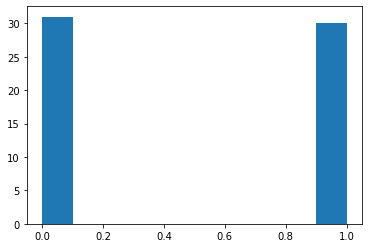

In [25]:
plt.hist(y_test_VGG)

#  Keras implementation of the VGG architecture.

In [26]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D,Flatten, MaxPooling2D
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization,Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image


# VGG Model

In [27]:
img_input = keras.Input(shape=(224, 224, 3))
channel_axis=3
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(img_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
drop1  = Dropout(0.5)(dense1)
dense2 = Dense(4096, activation="relu")(drop1)
drop2  = Dropout(0.5)(dense2)
output = Dense(2, activation="softmax")(drop2)

vgg16_model = Model(inputs=img_input, outputs=output)

In [28]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

In [29]:
opt=tf.keras.optimizers.SGD(learning_rate=0.001)

# Training the Model

In [92]:
vgg16_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']    
)

In [101]:
history_vgg16=vgg16_model.fit(
   x_train_VGG,y_train_VGG,
    epochs=30,
    batch_size=15,
   validation_split=0.1
)

Epoch 1/30
21/21 [==============================] - 316s 15s/step - loss: nan - accuracy: 0.4675 - val_loss: nan - val_accuracy: 0.5714
Epoch 2/30
21/21 [==============================] - 310s 15s/step - loss: nan - accuracy: 0.4903 - val_loss: nan - val_accuracy: 0.5714
Epoch 3/30
21/21 [==============================] - 308s 15s/step - loss: nan - accuracy: 0.4903 - val_loss: nan - val_accuracy: 0.5714
Epoch 4/30
21/21 [==============================] - 275s 13s/step - loss: nan - accuracy: 0.4903 - val_loss: nan - val_accuracy: 0.5714
Epoch 5/30
21/21 [==============================] - 229s 11s/step - loss: nan - accuracy: 0.4903 - val_loss: nan - val_accuracy: 0.5714
Epoch 6/30
21/21 [==============================] - 236s 11s/step - loss: nan - accuracy: 0.4903 - val_loss: nan - val_accuracy: 0.5714
Epoch 7/30
21/21 [==============================] - 269s 13s/step - loss: nan - accuracy: 0.4903 - val_loss: nan - val_accuracy: 0.5714
Epoch 8/30
21/21 [==============================

# Evaluating the model on test data

In [102]:
pred_VGG16=vgg16_model.evaluate(x_test_VGG, y_test_VGG)

2/2 [==============================] - 8s 4s/step - loss: nan - accuracy: 0.5082


In [365]:
pred_VGG16=vgg16_model.evaluate(x_train_VGG,y_train_VGG)

11/11 [==============================] - 68s 6s/step - loss: nan - accuracy: 0.4985


# Display the predicted output of the test data¶

In [103]:
import numpy as np
y_pred_vgg16 = np.argmax(vgg16_model.predict(x_test_VGG), axis=1)
print(y_pred_vgg16)
print(len(y_pred_vgg16))
len(y_test_VGG)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
61


61

In [104]:
y_pred_vgg16

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Create Confusion Matrix

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cm_vgg16=confusion_matrix(y_pred_vgg16,y_test_VGG)
cm_df_vgg16 = pd.DataFrame(cm_vgg16, index=['Mild','Severe'], columns=['Mild','Severe'])
cm_df_vgg16.head()

,Mild,Severe
Mild,31,30
Severe,0,0


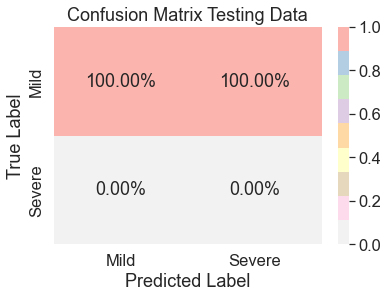

In [106]:
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(cm_df_vgg16/np.sum(cm_df_vgg16), annot=True, 
            fmt='.2%', cmap='Pastel1_r')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix Testing Data')
plt.show()

# AlexNet

# Resizing images

In [57]:
resized_image_AlexNet=[]
for i in imagePaths:
    image1_AlexNet=dicom.read_file(i)
    im_AlexNet=image1_AlexNet.pixel_array
    im2_AlexNet=cv2.resize(im_AlexNet,(227,227))
    resized_image_AlexNet.append(im2_AlexNet)

In [58]:
len(resized_image_AlexNet)

404

In [59]:
lst1_AlexNet=[]
for i in resized_image_AlexNet[0:]:
    resized_images_AlexNet=np.array([i,i,i])
    resized_images_AlexNet=np.moveaxis(resized_images_AlexNet,0,-1)
    lst1_AlexNet.append(resized_images_AlexNet)

In [60]:
images_AlexNet=np.array(lst1_AlexNet)
images_AlexNet=np.array(lst1_AlexNet)
images_AlexNet.shape

(404, 227, 227, 3)

# Splitting the dataset into training and testing

In [61]:
from sklearn.model_selection import train_test_split
x_train_AlexNet, x_test_AlexNet, y_train_AlexNet, y_test_AlexNet = train_test_split(images_AlexNet, updated_label,test_size=0.15,shuffle=True,stratify=updated_label)

(array([171.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 172.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

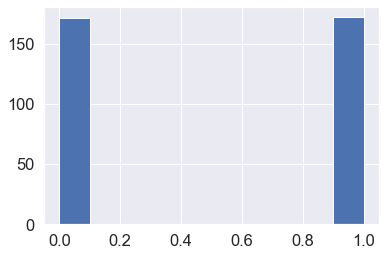

In [62]:
plt.hist(y_train_AlexNet)

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

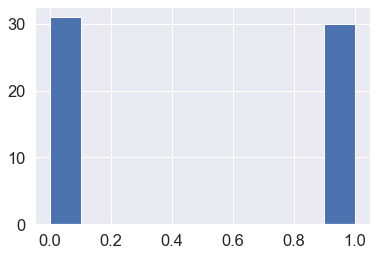

In [63]:
plt.hist(y_test_AlexNet)

In [64]:
img_input = keras.Input(shape=(227, 227, 3))
channel_axis=3

In [65]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2,activation='softmax')      
])

# Create model

# RMSprop Optimizer

In [66]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.RMSprop(lr=0.0001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [67]:
history=model.fit(
    x_train_AlexNet,y_train_AlexNet,
    epochs=30,
    batch_size=25,
    validation_split=0.1
)

Epoch 1/30
13/13 [==============================] - 33s 2s/step - loss: 6.8449 - accuracy: 0.4416 - val_loss: 2.1412 - val_accuracy: 0.6571
Epoch 2/30
13/13 [==============================] - 30s 2s/step - loss: 2.5877 - accuracy: 0.5162 - val_loss: 4.3156 - val_accuracy: 0.7714
Epoch 3/30
13/13 [==============================] - 30s 2s/step - loss: 3.2132 - accuracy: 0.5032 - val_loss: 6.5776 - val_accuracy: 0.3714
Epoch 4/30
13/13 [==============================] - 30s 2s/step - loss: 1.8665 - accuracy: 0.5519 - val_loss: 4.1486 - val_accuracy: 0.4857
Epoch 5/30
13/13 [==============================] - 31s 2s/step - loss: 2.2316 - accuracy: 0.5422 - val_loss: 7.7470 - val_accuracy: 0.3429
Epoch 6/30
13/13 [==============================] - 31s 2s/step - loss: 2.7318 - accuracy: 0.5195 - val_loss: 3.2564 - val_accuracy: 0.5714
Epoch 7/30
13/13 [==============================] - 30s 2s/step - loss: 1.8457 - accuracy: 0.5682 - val_loss: 2.4012 - val_accuracy: 0.4857
Epoch 8/30
13/13 [==

# Evaluating the model on test data

In [68]:
pred_AlexNet=model.evaluate(x_test_AlexNet,y_test_AlexNet)

2/2 [==============================] - 1s 371ms/step - loss: 1.0066 - accuracy: 0.6230


In [69]:
pred_AlexNet=model.evaluate(x_train_AlexNet,y_train_AlexNet)

11/11 [==============================] - 4s 393ms/step - loss: 0.8424 - accuracy: 0.6356


# Display the predicted output of the test data

In [121]:
import numpy as np
y_pred_AlexNet = np.argmax(model.predict(x_test_AlexNet), axis=1)
print(y_pred_AlexNet)
print(len(y_pred_AlexNet))
len(y_test_AlexNet)

[1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1]
61


61

# Create Confusion Matrix

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cm_AlexNet=confusion_matrix(y_pred_AlexNet,y_test_AlexNet)
cm_df_AlexNet = pd.DataFrame(cm_AlexNet, index=['Mild','Severe'], columns=['Mild','Severe'])
cm_df_AlexNet.head()

,Mild,Severe
Mild,11,3
Severe,20,27


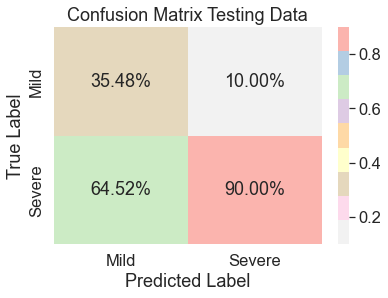

In [72]:
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(cm_df_AlexNet/np.sum(cm_df_AlexNet), annot=True, 
            fmt='.2%', cmap='Pastel1_r')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix Testing Data')
plt.show()

# Classification Report

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test_AlexNet,y_pred_AlexNet))

              precision    recall  f1-score   support

           0       0.79      0.35      0.49        31
           1       0.57      0.90      0.70        30

    accuracy                           0.62        61
   macro avg       0.68      0.63      0.60        61
weighted avg       0.68      0.62      0.59        61



# PREDICTION USING CLINICAL INFO

In [100]:
#Importing the data
df_credit2 = pd.read_csv("C:/Users/hp/es_dump_data.csv")
df_credit1 = pd.read_csv("C:/Users/hp/es_dump_data.csv")
df_credit1.head()

,Row_number,ImageFile,Age,Sex,Positivity at admission,Temp_C,DaysFever,Cough,DifficultyInBreathing,Therapy_anti-inflammatory,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,Chronic Kidney disease,RespiratoryFailure,Position,Prognosis,Death
0,339,P_342.dcm,58,0,0,36.6,1,0,0,1,...,0,0,0,0,0,0,0,0,MILD,0
1,323,P_324.dcm,61,0,1,38.2,4,0,0,1,...,0,0,0,0,0,0,0,0,MILD,0
2,314,P_314.dcm,59,1,1,37.5,3,1,0,1,...,0,0,0,0,0,0,0,0,MILD,0
3,317,P_317.dcm,69,0,1,37.0,3,0,0,1,...,0,0,0,0,0,0,0,0,MILD,0
4,349,P_358.dcm,28,0,1,37.6,4,1,0,1,...,0,0,0,0,0,0,0,0,MILD,0


In [101]:
df_credit1=df_credit1.drop(['Row_number', 'ImageFile'],axis=1)
df_credit1.head()

,Age,Sex,Positivity at admission,Temp_C,DaysFever,Cough,DifficultyInBreathing,Therapy_anti-inflammatory,Therapy_Tocilizumab,Therapy_Anakinra,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,Chronic Kidney disease,RespiratoryFailure,Position,Prognosis,Death
0,58,0,0,36.6,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
1,61,0,1,38.2,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
2,59,1,1,37.5,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
3,69,0,1,37.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0
4,28,0,1,37.6,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,MILD,0


In [102]:
print(df_credit1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         378 non-null    int64  
 1   Sex                         378 non-null    int64  
 2   Positivity at admission     378 non-null    int64  
 3   Temp_C                      378 non-null    float64
 4   DaysFever                   378 non-null    int64  
 5   Cough                       378 non-null    int64  
 6   DifficultyInBreathing       378 non-null    int64  
 7   Therapy_anti-inflammatory   378 non-null    int64  
 8   Therapy_Tocilizumab         378 non-null    int64  
 9   Therapy_Anakinra            378 non-null    int64  
 10  Therapy_hydroxychloroquine  378 non-null    int64  
 11  Therapy_antiviral           378 non-null    int64  
 12  Therapy_Eparine             378 non-null    int64  
 13  WBC                         378 non

In [103]:
#Looking unique values
print(df_credit1.nunique())
#Looking the data
print(df_credit1.head())

Age                            65
Sex                             2
Positivity at admission         2
Temp_C                         41
DaysFever                       4
Cough                           2
DifficultyInBreathing           2
Therapy_anti-inflammatory       2
Therapy_Tocilizumab             2
Therapy_Anakinra                1
Therapy_hydroxychloroquine      2
Therapy_antiviral               2
Therapy_Eparine                 4
WBC                           287
RBC                           182
CRP                           349
Glucose                       118
PaO2                          212
PaCO2                         134
pH                             42
CardiovascularDisease           2
IschemicHeartDisease            2
AtrialFibrillation              2
HeartFailure                    2
Ictus                           2
HighBloodPressure               2
Diabetes                        2
Dementia                        2
BPCO                            2
Cancer        

In [104]:
df_credit1['Prognosis'].count()

378

In [105]:
df_credit1['Prognosis'].value_counts()

SEVERE    204
MILD      174
Name: Prognosis, dtype: int64

# Handling categorical data

In [106]:
# Map risk column good to 0 and bad to 1
df_credit1['Prognosis'] = df_credit1['Prognosis'].map({'SEVERE':1, 'MILD':0})

In [107]:
Prognosis=df_credit1['Prognosis']

# Split data into training and testing 

In [109]:
# Spliting data into train and test version
X_train, X_test, y_train, y_test = train_test_split(df_credit1, Prognosis, test_size = 0.30, random_state=42)

# Model Building

# KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
y_pred = classifier.predict(X_test)
print('\nAccuracy of K-nearest Neighbor classifier on test set: {:.2f}'.format(accuracy_score(y_pred,y_test)))


Accuracy of K-nearest Neighbor classifier on test set: 0.61


In [112]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_matrix_knn)
#sns.heatmap(confusion_matrix_knn, annot=True)
confusion_matrix_knn = pd.DataFrame(confusion_matrix_knn, index=['Mild','Severe'], columns=['Mild','Severe'])
confusion_matrix_knn.head()

Confusion Matrix: 
 [[30 30]
 [15 39]]


,Mild,Severe
Mild,30,30
Severe,15,39


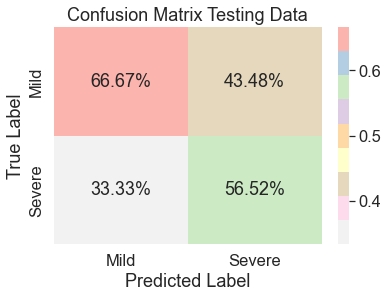

In [113]:
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(confusion_matrix_knn/np.sum(confusion_matrix_knn), annot=True, 
            fmt='.2%', cmap='Pastel1_r')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix Testing Data')
plt.show()

# Logistic Regression Model Fitting

In [115]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Predicting the test dataset results and calculating the accuracy

In [116]:
pred_y = logreg.predict(X_test)
probabilities=logreg.predict_proba(X_test)
print('\nAccuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('\nAccuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(pred_y,y_test)))
print(pred_y)
pred_y=np.where(pred_y > 0.5,1,0)


Accuracy of logistic regression classifier on test set: 0.99

Accuracy of logistic regression classifier on test set: 0.99
[1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1]


# Confusion Matrix

In [117]:
confusion_matrix_logreg = confusion_matrix(y_test,pred_y)
print("Confusion Matrix: \n",confusion_matrix_logreg)
confusion_matrix_logreg = pd.DataFrame(confusion_matrix_logreg, index=['Mild','Severe'], columns=['Mild','Severe'])
confusion_matrix_logreg.head()

Confusion Matrix: 
 [[59  1]
 [ 0 54]]


,Mild,Severe
Mild,59,1
Severe,0,54


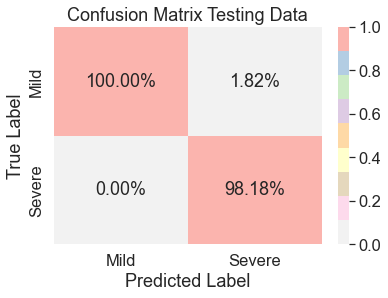

In [118]:
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(confusion_matrix_logreg/np.sum(confusion_matrix_logreg), annot=True, 
            fmt='.2%', cmap='Pastel1_r')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix Testing Data')
plt.show()

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        54

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Prognosis  MILD  SEVERE
Diabetes               
0            11      35


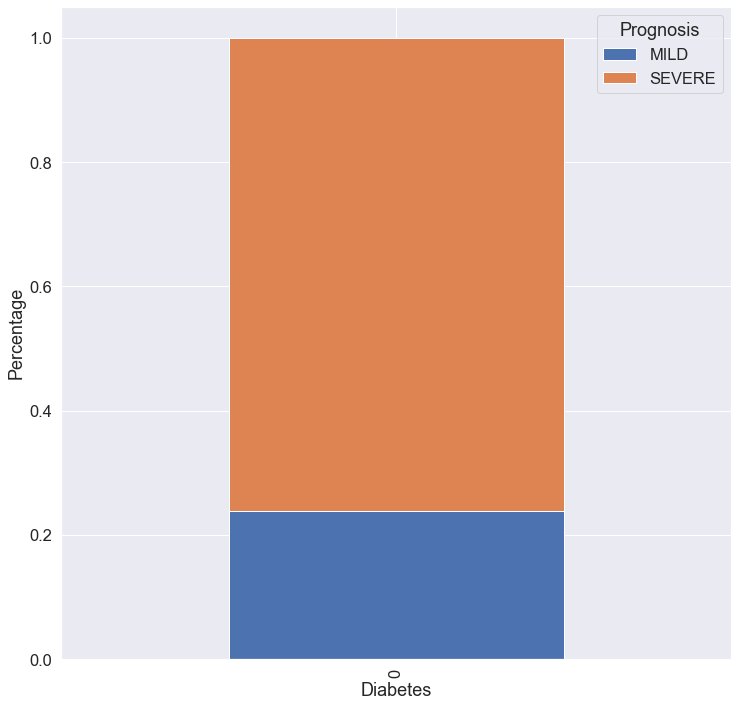

Prognosis     MILD   SEVERE
Diabetes                   
0          0.23913  0.76087
Diabetes
0    46.0
dtype: float64


In [120]:
#Let's look the Credit Amount column
interval = (0,25,40)
Diabetes = ['0', '1']
df_credit1["Diabetes"] = pd.cut(df_credit1.Diabetes,interval,labels=Diabetes)
print(pd.crosstab(df_credit1["Diabetes"],df_credit2['Prognosis']))
Income_bin = pd.crosstab(df_credit1["Diabetes"],df_credit2['Prognosis'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Diabetes")
plt.ylabel("Percentage")
plt.savefig('Diabetes_vs_Prognosis.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))
print(Income_bin.sum(1).astype(float))

Prognosis          MILD  SEVERE
HighBloodPressure              
0                    69      93


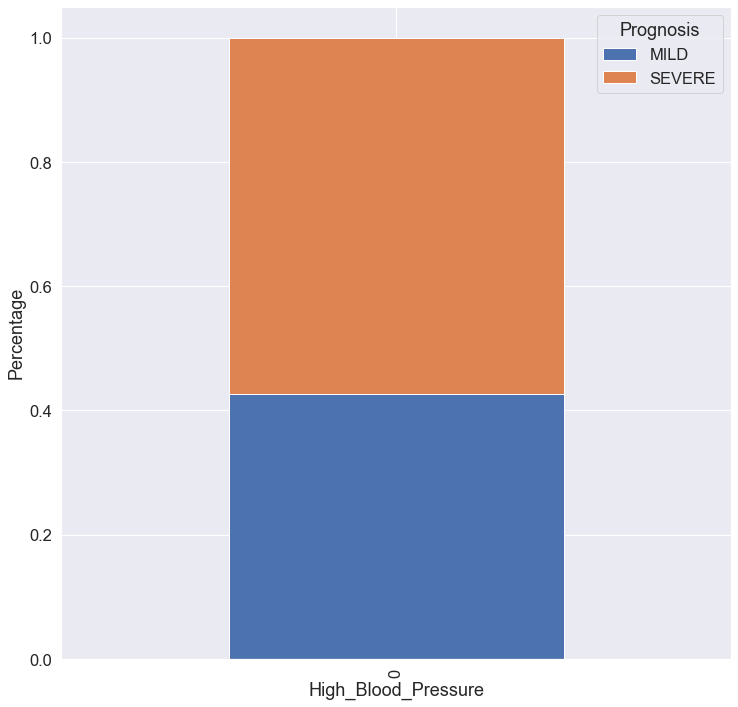

Prognosis              MILD    SEVERE
HighBloodPressure                    
0                  0.425926  0.574074


In [493]:
#Let's look the Credit Amount column
interval = (0,25, 40)

High_Blood_Pressure = ['0', '1']
df_credit1["HighBloodPressure"] = pd.cut(df_credit1.HighBloodPressure, interval, labels=High_Blood_Pressure)

print(pd.crosstab(df_credit1["HighBloodPressure"],df_credit2['Prognosis']))
Income_bin = pd.crosstab(df_credit1["HighBloodPressure"],df_credit2['Prognosis'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("High_Blood_Pressure")
plt.ylabel("Percentage")
plt.savefig('High_Blood_Pressure_vs_Prognosis.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))

Prognosis              MILD  SEVERE
CardiovascularDisease              
0                        41      74


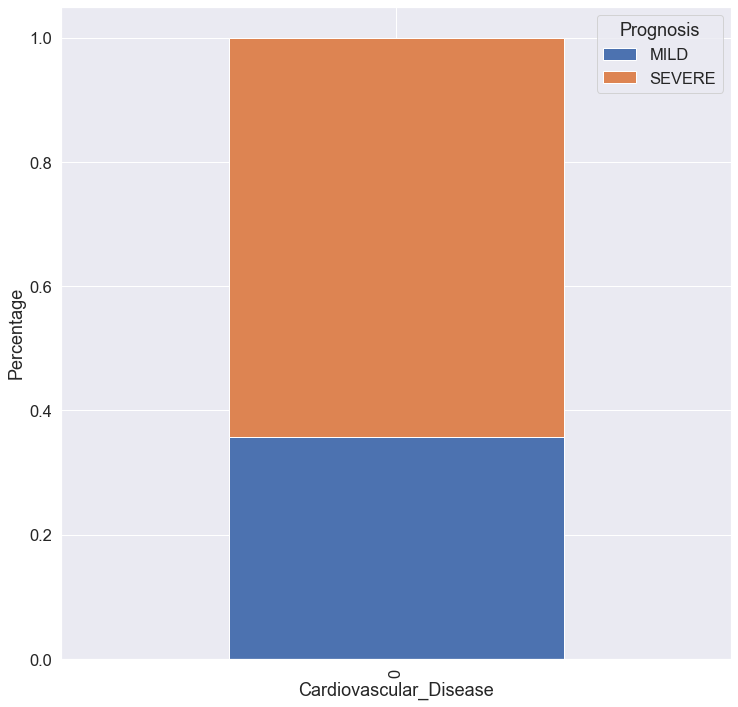

Prognosis                  MILD    SEVERE
CardiovascularDisease                    
0                      0.356522  0.643478


In [512]:
#Let's look the Credit Amount column
interval = (0,25,40)
CardiovascularDisease = ['0', '1']
df_credit1["CardiovascularDisease"] = pd.cut(df_credit1.CardiovascularDisease, interval, labels=CardiovascularDisease)
print(pd.crosstab(df_credit1["CardiovascularDisease"],df_credit2['Prognosis']))
Income_bin = pd.crosstab(df_credit1["CardiovascularDisease"],df_credit2['Prognosis'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(12,12))
plt.xlabel("Cardiovascular_Disease")
plt.ylabel("Percentage")
plt.savefig('Cardiovascular_Disease_vs_Prognosis.jpg')
plt.show()
print(Income_bin.div(Income_bin.sum(1).astype(float),axis=0))

In [250]:
CardiovascularDisease

['0', '1']

In [96]:
#import seaborn as sns
#sns.barplot(x='Prognosis',y='Age',data=df_credit2,palette='plasma')